<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 12</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Tenendo fissi tutti i parametri, utilizzare altri due diversi algoritmi di ottimizzazione (diversi da $\texttt{SGD}$) per costruire una rete neurale capace di distinguere le cifre scritte a mano.
    
Commentare i grafici di loss per le fasi di training e di test.
</div>

<div style="font-size: 0.43cm;">
In questa prima parte viene scaricato il dataset su cui far allenare le reti neurali al riconoscimento delle cifre e venogno costruite tutte le funzioni di costruzione e compilazione di reti neurali.
</div>

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
#print('... and with label', Y_train[20], 'after to_categorical')
#print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])

    print('Model compiled successfully and ready to be trained.')
    return model

In [6]:
# training parameters
batch_size = 32
epochs = 25

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Model compiled successfully and ready to be trained.
Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7280 - acc: 0.7885 - val_loss: 0.3028 - val_acc: 0.9176
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3727 - acc: 0.8941 - val_loss: 0.2340 - val_acc: 0.9324
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3016 - acc: 0.9159 - val_loss: 0.1969 - val_acc: 0.9421
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2598 - acc: 0.9275 - val_loss: 0.1721 - val_acc: 0.9476
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2301 - acc: 0.9351 - val_loss: 0.1573 - val_acc: 0.9500
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2070 - acc: 0.9418 - val_loss: 0.1430 - val_acc: 0.9541
Epoch 7/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1882 - acc: 0.9470 - val_loss: 0.1301 - val_acc: 0.9582
Epo

313/313 [==============================] - 1s 2ms/step - loss: 0.0700 - acc: 0.9776

Test loss: 0.07004913687705994
Test accuracy: 0.9775999784469604


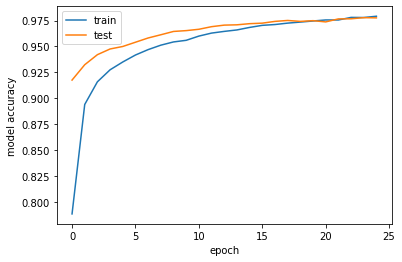

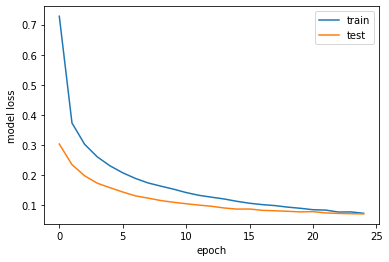

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

<div style="font-size: 0.43cm;">
L'accuratezza è di $97.5\%$.
</div>

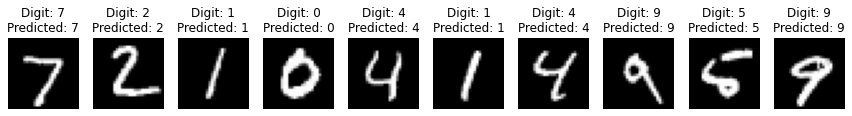

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):        
    ax = plt.subplot(2, 10, i + 1)        
    plt.imshow(X_test[i, :, :, 0], cmap='gray')        
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))        
    plt.axis('off') 
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

<div style="font-size: 0.43cm;">
Tutte le cifre vengono individuate correttamente.
</div>

<div style="font-size: 0.43cm;">
Si prova ad utilizzare l'ottimizzatore $\texttt{Adagrad}$.
</div>

Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0690 - acc: 0.9800 - val_loss: 0.0682 - val_acc: 0.9788
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0683 - acc: 0.9800 - val_loss: 0.0696 - val_acc: 0.9791
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0650 - acc: 0.9811 - val_loss: 0.0677 - val_acc: 0.9788
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0628 - acc: 0.9819 - val_loss: 0.0685 - val_acc: 0.9781
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - acc: 0.9833 - val_loss: 0.0668 - val_acc: 0.9783
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0573 - acc: 0.9840 - val_loss: 0.0652 - val_acc: 0.9788
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0549 - acc: 0.9844 - val_loss: 0.0657 - val_acc: 0.9788
Epoch 8/25
1875/1875 [==============================] - 8s 4ms

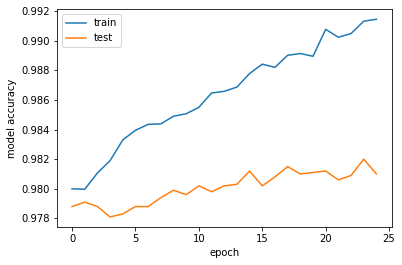

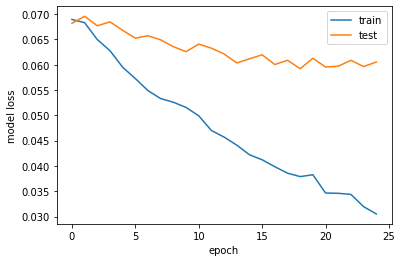

In [9]:
# training parameters
batch_size = 32
epochs = 25

# create the model
model=create_DNN()

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(),
              metrics=['acc'])

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

<div style="font-size: 0.43cm;">
La funzione loss delle fasi di train e di test sono entrambe "mediamente" decrescenti; questo è sintomo del fatto che non si sia ancora in una condizione di overfitting.

Le funzioni di loss, però, sono meno smooth di quelle ottenute utilizzando $\texttt{SGD}$.
</div>

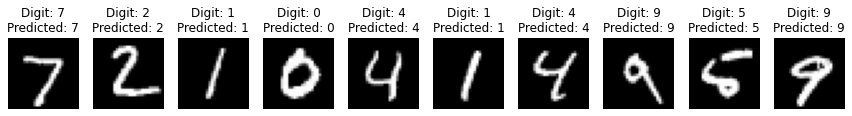

In [10]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):        
    ax = plt.subplot(2, 10, i + 1)        
    plt.imshow(X_test[i, :, :, 0], cmap='gray')        
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))        
    plt.axis('off') 
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

<div style="font-size: 0.43cm;">
L'accuratezza sul test è del $98\%$ e tutte le cifre qua riportate sono identificate correttamente.
</div>

<div style="font-size: 0.43cm;">
Si utilizza ora, come ottimizzatore, $\texttt{Nadam}$.
</div>

Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0300 - acc: 0.9917 - val_loss: 0.0598 - val_acc: 0.9819
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0291 - acc: 0.9918 - val_loss: 0.0616 - val_acc: 0.9806
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0291 - acc: 0.9919 - val_loss: 0.0613 - val_acc: 0.9814
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0283 - acc: 0.9921 - val_loss: 0.0603 - val_acc: 0.9817
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0266 - acc: 0.9926 - val_loss: 0.0608 - val_acc: 0.9812
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0264 - acc: 0.9929 - val_loss: 0.0604 - val_acc: 0.9814
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0263 - acc: 0.9926 - val_loss: 0.0604 - val_acc: 0.9810
Epoch 8/25
1875/1875 [==============================] - 9s 5ms

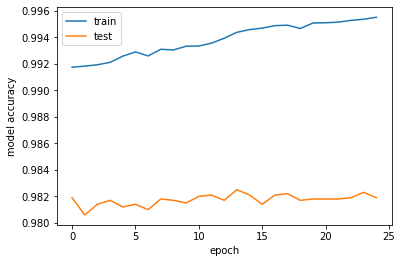

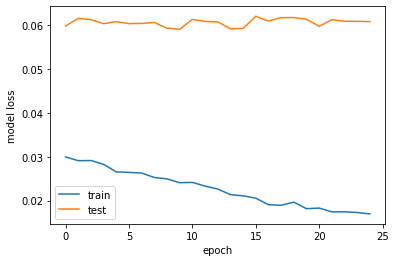

In [11]:
# training parameters
batch_size = 32
epochs = 25

# create the model
model=create_DNN()

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
                            optimizer=Nadam(),
                            metrics=['acc'])

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

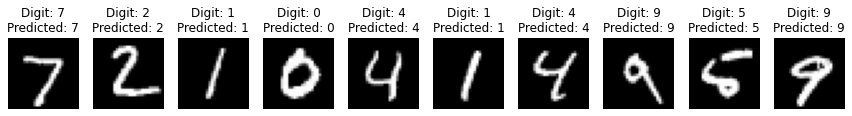

In [12]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):        
    ax = plt.subplot(2, 10, i + 1)        
    plt.imshow(X_test[i, :, :, 0], cmap='gray')        
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))        
    plt.axis('off') 
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

<div style="font-size: 0.43cm;">
L'accuratezza in questo caso è un pochino maggiore della precedente: $98.2\%$. Anche qui tutte le prime 10 cifre del dataset sono interpretate correttamente.
    
Entrambi gli algoritmi forniscono una precisione maggiore di $\texttt{SGD}$.
</div>

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Cambiare l'architettura della rete neurale utilizzando anche layer convoluzionali.
</div>

<div style="font-size: 0.43cm;">
Le cifre sono invarianti per traslazione di tutti i pixel. Affinché una rete neurale riesca ad assimilare questa simmetria, c'è bisogno di utilizzare layer convoluzionali.
</div>

In [13]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


<div style="font-size: 0.43cm;">
La costruzione della rete è ispirata dall'<a href='https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html'>esempio citato nelle slides</a>, togliendo uno dei layer finali totalmente connessi.
    
I layer convoluzionali sono alternati a layer di pooling che riducono il numero di neuroni.
</div>

In [14]:
def create_CNN():
    model = Sequential()
    # add first convolutional layer with 6 5x5 filters
    model.add(Conv2D(6, kernel_size=(5, 5), strides=1, activation='tanh', input_shape=input_shape))
    # add first max-pooling layer with 2x2 filters
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # add second convolutional layer with 16 5x5 filters
    model.add(Conv2D(16, kernel_size=(5, 5), strides=1, activation='tanh'))
    # add second max-pooling layer with 2x2 filters
    model.add(MaxPooling2D(strides=2))
    # add dropout layer with rate 0.5
    model.add(Dropout(0.5))
    # flatten operation (data don't change)
    model.add(Flatten())
    # add first dense layer
    model.add(Dense(100, activation='tanh'))
    # add output dense layer
    model.add(Dense(num_classes, activation='softmax'))

    print('Model architecture created successfully!')

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])

    print('Model compiled successfully and ready to be trained.')

    return model

In [15]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7207 - acc: 0.7937 - val_loss: 0.2317 - val_acc: 0.9336
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2889 - acc: 0.9146 - val_loss: 0.1628 - val_acc: 0.9514
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2265 - acc: 0.9319 - val_loss: 0.1324 - val_acc: 0.9597
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1960 - acc: 0.9401 - val_loss: 0.1111 - val_acc: 0.9654
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1741 - acc: 0.9477 - val_loss: 0.0970 - val_acc: 0.9706
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1571 - acc: 0.9513 - val_loss: 0.0843 - val_acc: 0.9731
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1445 - acc

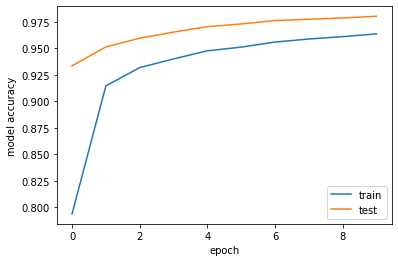

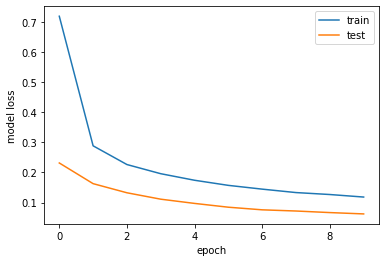

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

<div style="font-size: 0.43cm;">
Ho fatto allenare la rete per solo $10$ epoche in modo da metterne in evidenza i punti deboli.
</div>

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 3</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Creare $10$ immagini di cifre scritte a mano e testare se la rete è in grado di riconoscerle.
</div>

In [17]:
# TO LOAD FILES ON GOOGLE COLAB
#from google.colab import files
#upload = files.upload() #this will let you browse and choose the file to be uploaded

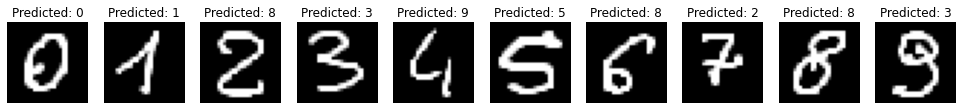

In [19]:
from PIL import Image
import os

plt.figure(figsize=(17, 17))

for t in range(10):
    digit_in = Image.open(str(t)+".png").convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    data = data.reshape(1,xdim*ydim)
    pred = model_DNN.predict(data)

    data = data.reshape(xdim,ydim)

    ax = plt.subplot(2, 10, t + 1)     
    plt.imshow(data, cmap='gray')        
    plt.title("Predicted: {}".format(np.argmax(pred)))
    plt.axis('off') 
    
plt.show()

<div style="font-size: 0.43cm;">
Questo primo set di prova è stato prodotto con una scrittura frettolosa e poco pulita: la precisione è del $50\%$.
    
- il numero 2, che per l'occhio umano è riconoscibile, è effettivamente molto simile ad un 8. La rete neurale non riesce a ignorare il "baffetto" in basso a destra perché non sa cosa succede quando si ha in mano una matita: il nostro cervello, invece, sa riconoscere un baffetto involontario da un segno significativo.
- il dataset con cui è stata allenata la rete neurale non aveva i 4 scritti in questo modo, quindi inevitabilmente sbaglia.
- anche il numero 7 ha una barretta orizzontale eccessivamente sporca: il nostro occhio lo riconosce come sporco, la rete neurale lo prende come la parte inferiore del 2.
</div>

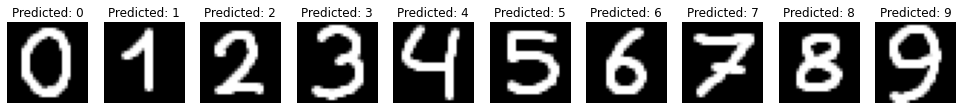

In [20]:
plt.figure(figsize=(17, 17))

for t in range(10):
    digit_in = Image.open(str(t)+"_bello.png").convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    data = data.reshape(1,xdim*ydim)
    pred = model_DNN.predict(data)

    data = data.reshape(xdim,ydim)

    ax = plt.subplot(2, 10, t + 1)     
    plt.imshow(data, cmap='gray')        
    plt.title("Predicted: {}".format(np.argmax(pred)))
    plt.axis('off') 
    
plt.show()

<div style="font-size: 0.43cm;">
In questo secondo set, più pulito, la rete riconosce tutto (anche il 4, una volta scritto come era abituata a vederlo).
</div>

<div style="font-size: 0.43cm;">
Si veda ora come funzionano i filtri dei layer convoluzionali (qua si mostra il layer iniziale, anche per una questione di comprensione: il 7 è rintracciabile dall'occhio anche dopo l'utilizzo dei filtri, cosa impossibile nei layer successivi).
</div>

In [21]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 dropout_3
5 flatten
6 dense_9
7 dense_10


(5, 5, 1, 6)


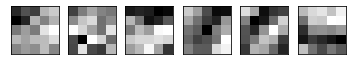

In [22]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

<div style="font-size: 0.43cm;">
Questi sono i $6$ filtri di dimensione $5\times5$ che operano sull'immagine iniziale di $28\times28$ pixels, producendo quindi immagini (matrici) $23\times23$.
</div>

In [23]:
test_index = 0

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

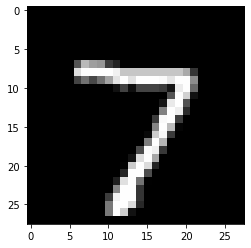

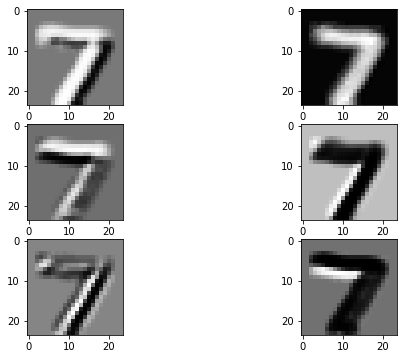

In [24]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
display_activation(activations, 2, 3, 0)

<div style="font-size: 0.43cm;">
Dall'area completamente nera della figura esce come risultato di convoluzione del filtro un valore sempre uguale (è una specie di media di pesi, dato che devono moltiplicare tutti lo stesso numero, ossia la funzione di attivazione in $0$).

L'azione del filtro è interessante nelle regioni quadrate $5\times5$ in cui non c'è solo un colore, quindi dove ci sono segni.
    
È esplicativo l'esempio del sesto filtro sulla figura. Il filtro è caratterizzato da una parte orizzontale più chiara in alto e una parte più scura in basso. Quando questo filtro si trova a "viaggiare" sul disegno del 7, trova grande corrispondenza in prossimità della barretta orizzontale in alto; infatti si vede bene che nella figura che rappresenta il layer di convoluzione ci sono tanti pixel bianchi (neuroni accesi) in quella zona.
    
Con un pizzico di impegno e immaginazione si riesce a fare lo stesso lavoro anche con gli altri filtri. L'occhio e il cervello umano, però, falliscono appena si passa ai layer successivi, dove non ci sono vere e proprie forme che si possano identificare.
</div>